In [1]:
try: 
    %reload_ext autoreload
except:
    %load_ext autoreload
%autoreload 2
%run basic_material

from numpy.random import randn
from numpy import eye, array, asarray, exp

from sympy import Matrix, init_printing
init_printing()

from math import sqrt
import scipy.linalg as la
from scipy.linalg import expm, solve_discrete_lyapunov, sqrtm
from scipy.integrate import odeint

Running Python: 3.8.16


In [2]:
tf = 5
Npts = 1000 
t = np.linspace(0,tf,Npts)

def deriv(y, t, A, B, W, n=1):
    Q = y.reshape(n,n)
    dotQ = A@Q + Q@A.T + B@np.atleast_2d(W)@B.T
    return dotQ.reshape(n**2,)

In [5]:
A=np.array([-1])
B=np.array([1])
Wc=np.array([5])
Q01=np.array([5])
Q02=np.array([0])
C=np.array([0])

Nx = A.shape[0]

Q1 = B**2*Wc/2/A*(np.exp(2*A*t)-1)+Q01*np.exp(2*A*t);
Q2 = B**2*Wc/2/A*(np.exp(2*A*t)-1)+Q02*np.exp(2*A*t);

Pss=-B*2*Wc/2/A;

# integrate Q
Qsol1 = odeint(deriv, Q01.reshape(Nx**2,), t, args=(A, B, Wc, Nx))
Qsol2 = odeint(deriv, Q02.reshape(Nx**2,), t, args=(A, B, Wc, Nx))
# steady state Q
Qcss = la.solve_continuous_lyapunov(A, -B@np.atleast_2d(Wc)@B.T) # note - here

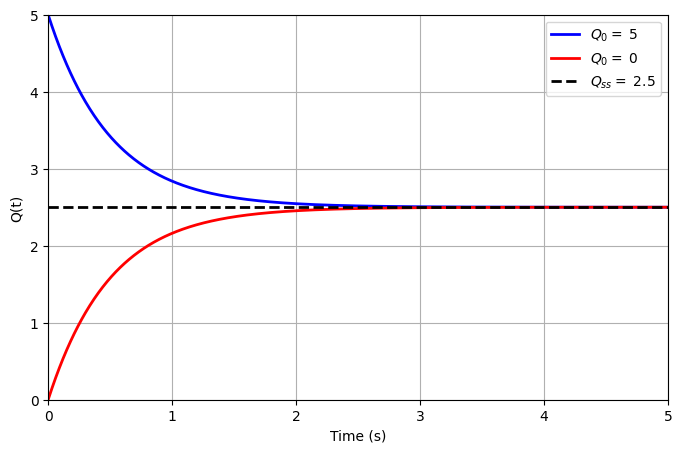

In [6]:
f, axs = plt.subplots(1, 1, sharex=True, figsize=(8,5))
axs.plot(t, Qsol1, 'b', label=r'$Q_{0} = $ '+str(Q01[0]))
axs.plot(t, Qsol2, 'r-', label=r'$Q_{0} = $ '+str(Q02[0]))
axs.plot(np.array([t[0],t[-1]]), np.array([Qcss[0],Qcss[0]]), 'k--', 
         label=r'$Q_{ss} = $ '+str(Qcss[0][0]))
plt.legend()
plt.legend(loc='best')
plt.ylim([0,5])
plt.xlim([0,tf])
plt.ylabel(r'Q(t)')
plt.xlabel(r'Time (s)')
plt.savefig("figs/Pconv2.png")
plt.show()